
# Module 3 - Exploratory Visualization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv("cleaned_support_tickets.csv")
df.head()

,ticket_subject,ticket_description,resolution,ticket_type,support_queue,priority_level,category,priority_score,resolution_duration
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich mÃ¶chte ein...",Vielen Dank fÃ¼r die Meldung des kritischen Si...,Incident,Technical Support,High,Security,3,52
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,High,Account,3,15
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,Medium,Product,2,61
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,Low,Billing,1,21
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,Medium,Product,2,24


# Ticket Type Distribution

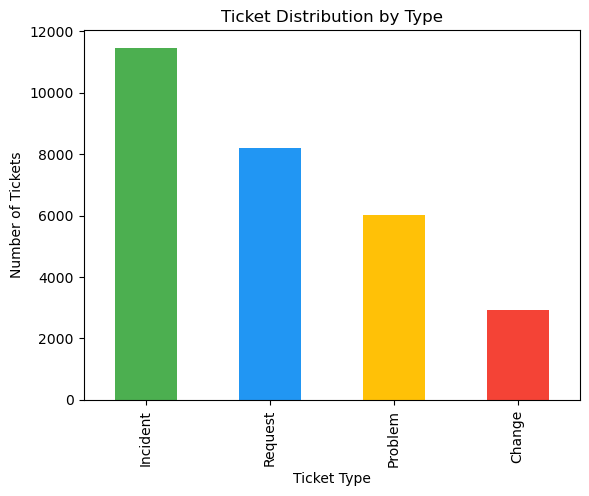

In [11]:
df["ticket_type"].value_counts().plot(kind="bar",color=["#4CAF50", "#2196F3", "#FFC107", "#F44336"])
plt.title("Ticket Distribution by Type")
plt.xlabel("Ticket Type")
plt.ylabel("Number of Tickets")
plt.show()
#This visualization shows how tickets are distributed based on their type.
#It helps identify whether most tickets are service requests, issues, or queries.

# Identify Top Categories by Frequency

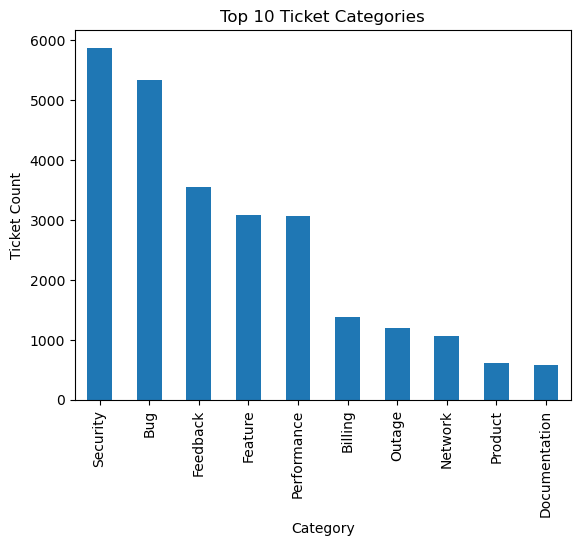

In [13]:
df["category"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Ticket Categories")
plt.xlabel("Category")
plt.ylabel("Ticket Count")
plt.show()
#This chart highlights the most common problem categories raised by users.”

# Cluster Categories by Frequency

In [15]:
category_freq = df["category"].value_counts()

high_freq = category_freq[category_freq > 100]
medium_freq = category_freq[(category_freq <= 100) & (category_freq > 30)]
low_freq = category_freq[category_freq <= 30]

print("High Frequency Categories:\n", high_freq)
print("\nMedium Frequency Categories:\n", medium_freq)
print("\nLow Frequency Categories:\n", low_freq)
#grouped categories into high, medium, and low frequency clusters to prioritize problem areas.

High Frequency Categories:
 category
Security         5880
Bug              5337
Feedback         3557
Feature          3081
Performance      3065
Billing          1382
Outage           1199
Network          1063
Product           611
Documentation     586
Crash             463
Marketing         410
Disruption        353
IT                239
Login             185
Sales             135
Hardware          128
Backup            109
Name: count, dtype: int64

Medium Frequency Categories:
 category
Customer Support    75
Maintenance         63
Account             60
Support             57
Integration         54
Tech Support        52
Payment             50
HR                  45
Strategy            44
Return              40
Finance             35
Name: count, dtype: int64

Low Frequency Categories:
 category
Customer Service                                                    25
Pricing                                                             14
Data                                       

# Visualize Tickets by Priority

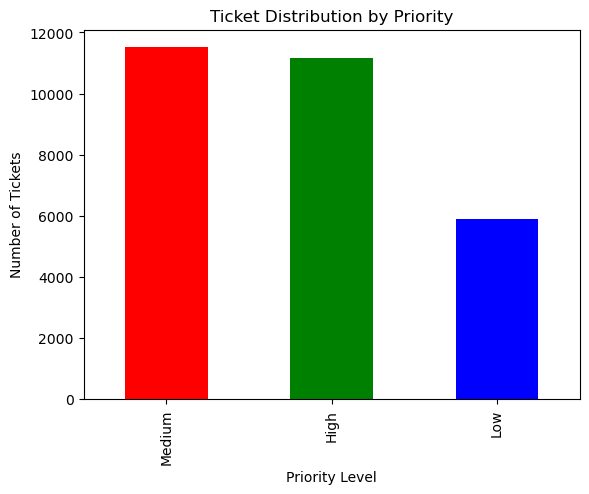

In [17]:
df["priority_level"].value_counts().plot(kind="bar",color=["red","green","blue"])
plt.title("Ticket Distribution by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Number of Tickets")
plt.show()
#This graph shows how urgent the overall support workload is
#“A higher number of high-priority tickets indicates pressure on support resources.

# Visualize Tickets by Support Queue

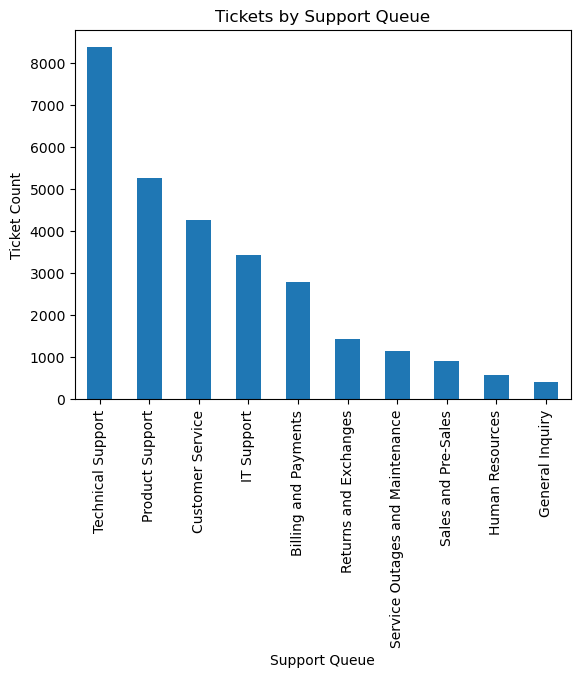

In [19]:
df["support_queue"].value_counts().plot(kind="bar")
plt.title("Tickets by Support Queue")
plt.xlabel("Support Queue")
plt.ylabel("Ticket Count")
plt.show()
#analyzed tickets handled by different teams.
#Shows which team has more workload.

# MODULE 4: Similarity and Cluster Insights 


In [21]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [22]:
# Selecting numerical features for clustering
X = df[["priority_score", "resolution_duration"]]


In [24]:
# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Assign cluster labels to each ticket
df["cluster"] = kmeans.fit_predict(X)

# View cluster distribution
df["cluster"].value_counts()


cluster
1    10069
0     9371
2     9147
Name: count, dtype: int64

# Visual 1: Cluster Size Distribution

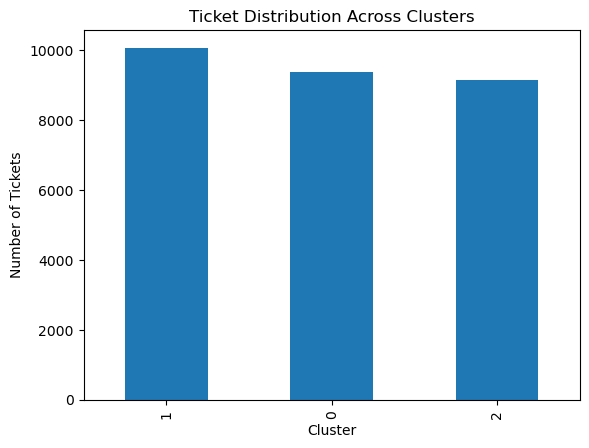

In [26]:
df["cluster"].value_counts().plot(
    kind="bar",
    colormap="tab10"
)
plt.title("Ticket Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Tickets")
plt.show()
#Bar chart shows distribution of tickets across clusters.

# Calculate Similarity Scores

In [ ]:
#To measure how similar tickets are within each cluster, I calculated a similarity score

In [ ]:
--> Similarity Calculation
Each cluster has a center representing average ticket behavior.
For every ticket, I calculate the distance from its cluster center using np.linalg.norm.
Smaller distance means the ticket is more similar to its cluster.
converted distance into a similarity score using 1 / (1 + distance).
Higher similarity score = more consistent ticket, lower score = potential issue.

In [28]:
# Get cluster centers
centers = kmeans.cluster_centers_

# Calculate distance from cluster center
distances = []
for i, row in df.iterrows():
    center = centers[row["cluster"]]
    distance = np.linalg.norm(
        row[["priority_score", "resolution_duration"]] - center
    )
    distances.append(distance)

# Convert distance to similarity score
df["similarity_score"] = 1 / (1 + np.array(distances))


# Visual 2: Average Similarity per Cluster

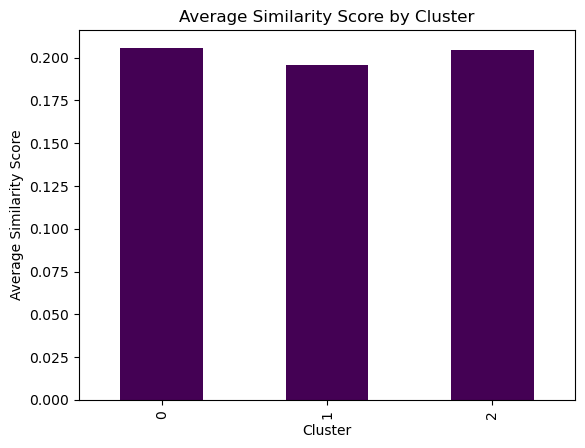

In [30]:
df.groupby("cluster")["similarity_score"].mean().plot(
    kind="bar",
    colormap="viridis"
)
plt.title("Average Similarity Score by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Average Similarity Score")
plt.show()

#How consistent each cluster is
#Higher bar → tickets behave similarly

# Cluster vs Issue Type Analysis

In [32]:
cluster_issue = df.groupby(
    ["cluster", "ticket_type"]
).size().unstack(fill_value=0)

cluster_issue
#Which type of issues exist in each cluster

ticket_type,Change,Incident,Problem,Request
cluster,,,,
0,917,3852,1928,2674
1,1063,3974,2130,2902
2,942,3640,1954,2611


# Visual 3: Cluster vs Ticket Type (Stacked Bar)

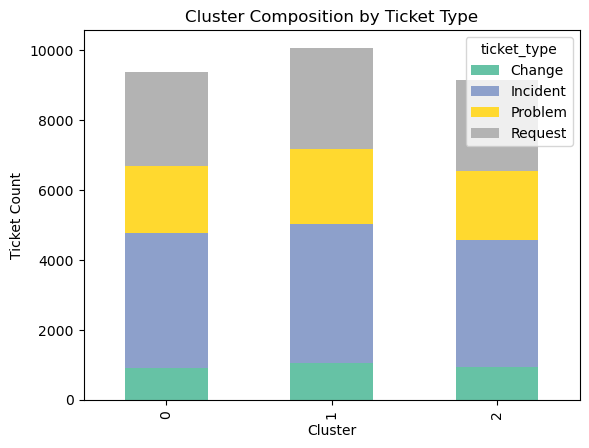

In [34]:
cluster_issue.plot(
    kind="bar",
    stacked=True,
    colormap="Set2"
)
plt.title("Cluster Composition by Ticket Type")
plt.xlabel("Cluster")
plt.ylabel("Ticket Count")
plt.show()
#Issue composition of each cluster

# Visual 4: Priority Distribution by Cluster (Boxplot)

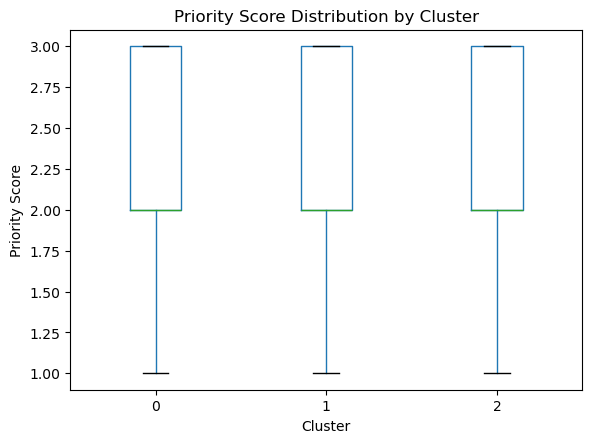

In [36]:
df.boxplot(
    column="priority_score",
    by="cluster",
    grid=False
)
plt.title("Priority Score Distribution by Cluster")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Priority Score")
plt.show()
#This boxplot shows how ticket priority varies across clusters

# Visual 5: Resolution Duration by Cluster (Boxplot)

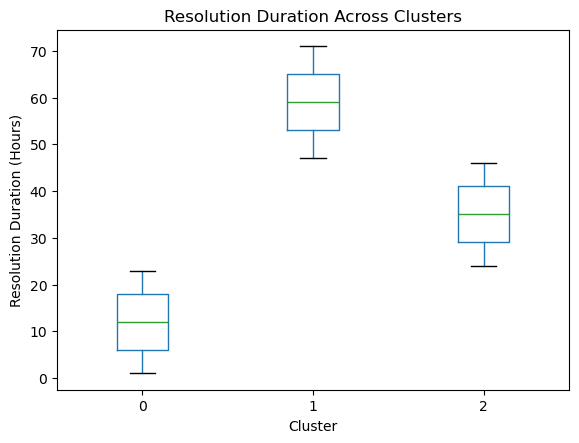

In [38]:
df.boxplot(
    column="resolution_duration",
    by="cluster",
    grid=False
)
plt.title("Resolution Duration Across Clusters")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Resolution Duration (Hours)")
plt.show()
#This boxplot highlights performance gaps in resolution time.

# Visual 6: Priority vs Resolution Duration (Scatter Plot)

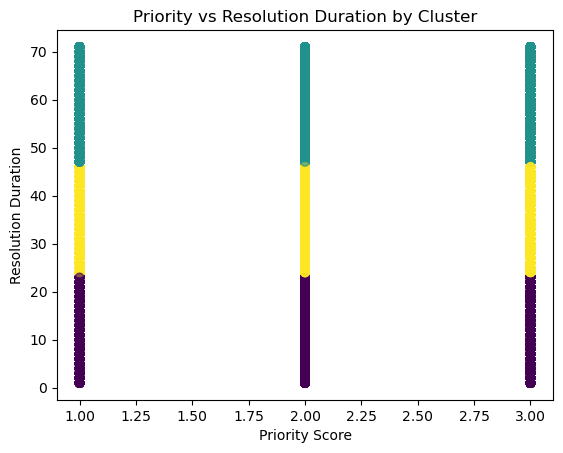

In [40]:
plt.scatter(
    df["priority_score"],
    df["resolution_duration"],
    c=df["cluster"],
    alpha=0.6
)
plt.title("Priority vs Resolution Duration by Cluster")
plt.xlabel("Priority Score")
plt.ylabel("Resolution Duration")
plt.show()
#This scatter plot visually shows how priority affects resolution duration across clusters

# Visual 7: Similarity Score Distribution

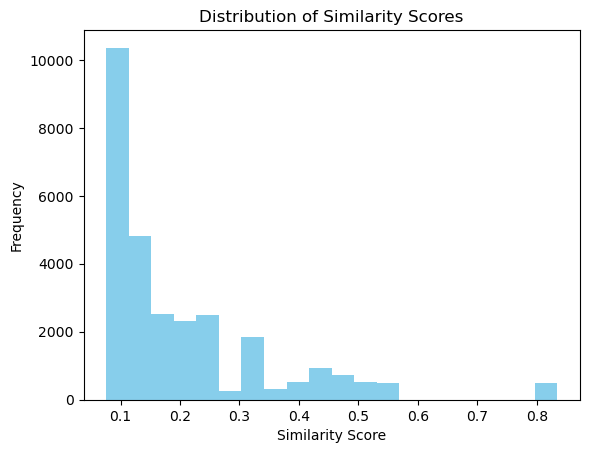

In [42]:
df["similarity_score"].plot(
    kind="hist",
    bins=20,
    color="skyblue"
)
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()
#This histogram shows how similarity scores are distributed across tickets

# Visual 8: Category Diversity per Cluster

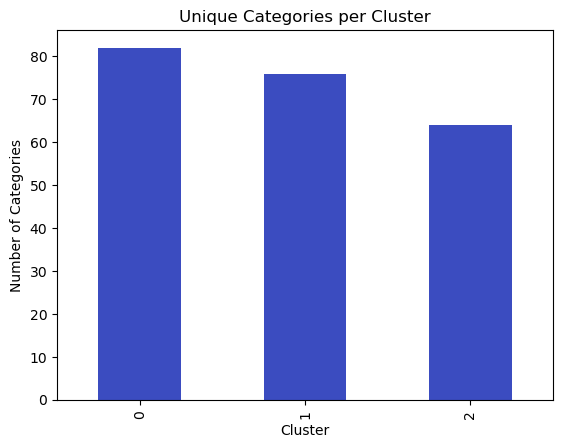

In [44]:
df.groupby("cluster")["category"].nunique().plot(
    kind="bar",
    colormap="coolwarm"
)
plt.title("Unique Categories per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Categories")
plt.show()
#This bar chart shows how diverse each cluster is in terms of issue categories

In [ ]:
#Together, Module 3 provides visual insights, and Module 4 converts those insights into actionable performance improvements for IT support teams.